# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**HARMONY, MNCUBE**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [43]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import calendar
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for data preparation and model building
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler as SS
from sklearn.preprocessing import MinMaxScaler
from collections import Counter


# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [2]:
df = pd.read_csv('df_train.csv') # load the data
df.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [ ]:
# # Print column names and data types
# for column_name, data_type in df.dtypes.items():
#     print(f"{column_name} ->: {data_type}")

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time_stamp            8763 non-null   object 
 1   Madrid_wind_speed     8763 non-null   float64
 2   Valencia_wind_deg     8763 non-null   int64  
 3   Bilbao_rain_1h        8763 non-null   float64
 4   Valencia_wind_speed   8763 non-null   float64
 5   Seville_humidity      8763 non-null   float64
 6   Madrid_humidity       8763 non-null   float64
 7   Bilbao_clouds_all     8763 non-null   float64
 8   Bilbao_wind_speed     8763 non-null   float64
 9   Seville_clouds_all    8763 non-null   float64
 10  Bilbao_wind_deg       8763 non-null   float64
 11  Barcelona_wind_speed  8763 non-null   float64
 12  Barcelona_wind_deg    8763 non-null   float64
 13  Madrid_clouds_all     8763 non-null   float64
 14  Seville_wind_speed    8763 non-null   float64
 15  Barcelona_rain_1h    

In [4]:
# def calculate_variance(df):
#     variances = df.var()
#     return variances

In [77]:
# # Call the function with the DataFrame df
# column_variances = calculate_variance(df['load_shortfall_3h'])
# # Print the variances
# print(column_variances)

In [39]:
Counter(df['Seville_pressure'])

Counter({'sp25': 410,
         'sp23': 339,
         'sp24': 405,
         'sp21': 408,
         'sp16': 392,
         'sp9': 183,
         'sp15': 326,
         'sp19': 357,
         'sp22': 392,
         'sp11': 139,
         'sp8': 418,
         'sp4': 404,
         'sp6': 411,
         'sp13': 500,
         'sp17': 401,
         'sp20': 340,
         'sp18': 395,
         'sp14': 255,
         'sp12': 378,
         'sp5': 372,
         'sp10': 460,
         'sp7': 174,
         'sp3': 309,
         'sp2': 325,
         'sp1': 270})

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [53]:
# look at data statistics
sorted(list(df.columns))

['Barcelona_pressure',
 'Barcelona_rain_1h',
 'Barcelona_rain_3h',
 'Barcelona_temp',
 'Barcelona_temp_max',
 'Barcelona_temp_min',
 'Barcelona_weather_id',
 'Barcelona_wind_deg',
 'Barcelona_wind_speed',
 'Bilbao_clouds_all',
 'Bilbao_pressure',
 'Bilbao_rain_1h',
 'Bilbao_snow_3h',
 'Bilbao_temp',
 'Bilbao_temp_max',
 'Bilbao_temp_min',
 'Bilbao_weather_id',
 'Bilbao_wind_deg',
 'Bilbao_wind_speed',
 'Madrid_clouds_all',
 'Madrid_humidity',
 'Madrid_pressure',
 'Madrid_rain_1h',
 'Madrid_temp',
 'Madrid_temp_max',
 'Madrid_temp_min',
 'Madrid_weather_id',
 'Madrid_wind_speed',
 'Month',
 'Season',
 'Seville_clouds_all',
 'Seville_humidity',
 'Seville_pressure',
 'Seville_rain_1h',
 'Seville_rain_3h',
 'Seville_temp',
 'Seville_temp_max',
 'Seville_temp_min',
 'Seville_weather_id',
 'Seville_wind_speed',
 'Valencia_humidity',
 'Valencia_pressure',
 'Valencia_snow_3h',
 'Valencia_temp',
 'Valencia_temp_max',
 'Valencia_temp_min',
 'Valencia_wind_deg',
 'Valencia_wind_speed',
 'date',
 

In [82]:
# plot relevant feature interactions
# seperated the coumns into respective features
wind_speed = ['Madrid_wind_speed', 'Valencia_wind_speed', 'Bilbao_wind_speed', 'Seville_wind_speed', 'Barcelona_wind_speed','load_shortfall_3h']
wind_degree = ['Valencia_wind_deg', 'Bilbao_wind_deg', 'Barcelona_wind_deg']
rain_1h = ['Bilbao_rain_1h', 'Seville_rain_1h', 'Barcelona_rain_1h', 'Madrid_rain_1h']
rain_3h = ['Seville_rain_3h', 'Barcelona_rain_3h', 'load_shortfall_3h']
humidity = ['Seville_humidity', 'Madrid_humidity', 'Valencia_humidity', 'load_shortfall_3h']
clouds_all = ['Seville_clouds_all','Madrid_clouds_all','Bilbao_clouds_all', 'load_shortfall_3h']
pressure = ['Seville_pressure', 'Barcelona_pressure', 'Valencia_pressure', 'Madrid_pressure','load_shortfall_3h']
snow_3h = ['Bilbao_snow_3h', 'Valencia_snow_3h', 'load_shortfall_3h']
weather_id = ['Bilbao_weather_id', 'Serville_weather_id', 'Barcelona_weather_id', 'Madrid_weather_id', 'load_shortfall_3h']
temp_max = ['Bilbao_temp_max', 'Seville_temp_max', 'Madrid_temp_max', 'Barcelona_temp_max', 'Valencia_temp_max', 'load_shortfall_3h']
temp_min = ['Bilbao_temp_min', 'Seville_temp_min', 'Madrid_temp_min', 'Barcelona_temp_min', 'Valencia_temp_max', 'load_shortfall_3h']
temp = ['Bilbao_temp', 'Seville_temp', 'Madrid_temp', 'Barcelona_temp', 'Valencia_temp', 'load_shortfall_3h']


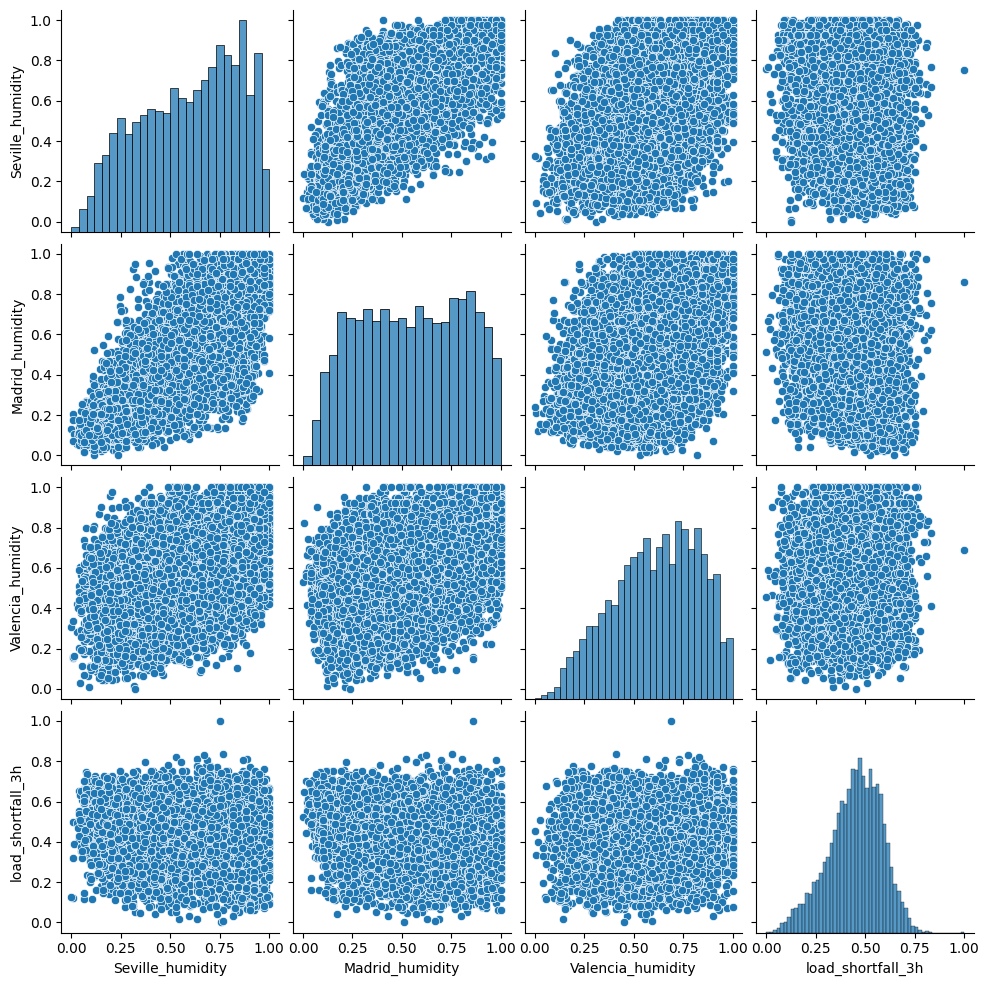

In [83]:
# Draw a pairwise plot
sns.pairplot(df[humidity])
plt.show();

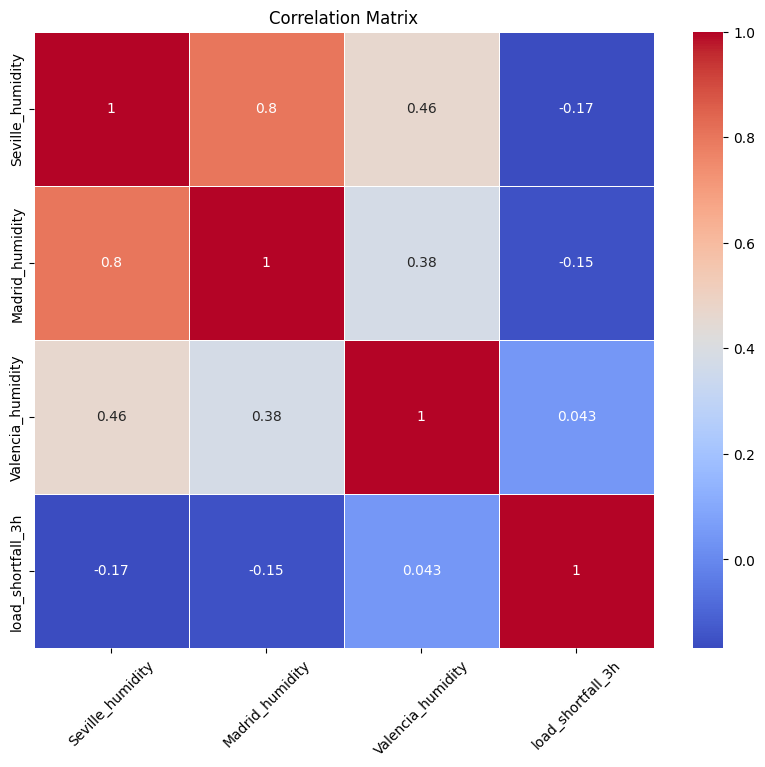

In [80]:
# Evaluate correlation
corr = df[humidity].corr()
# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.show()

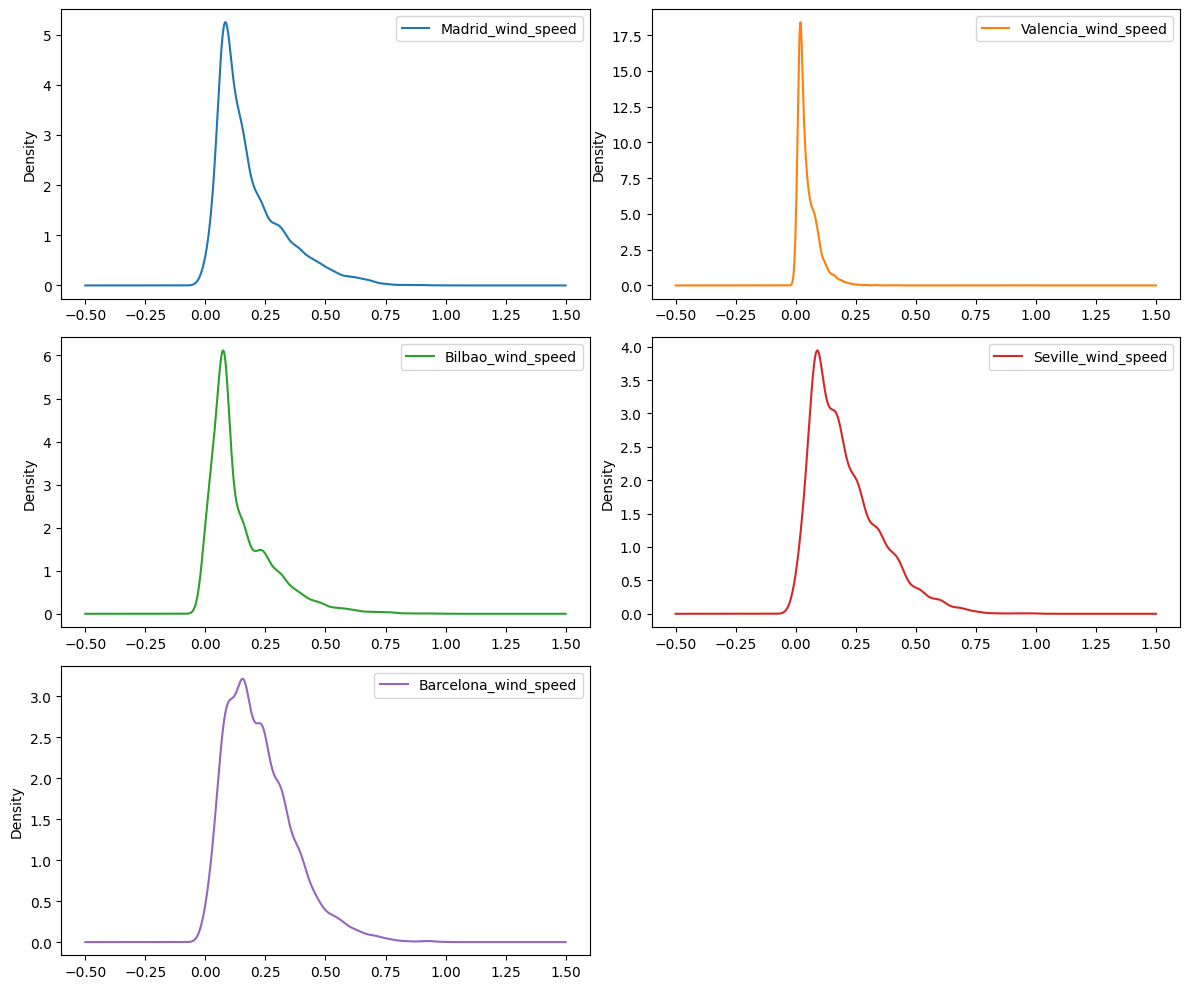

In [78]:
# Plot feature distributions
df[wind_speed].plot(kind='kde', subplots=True, layout=(3, 2), sharex=False, figsize=(12, 10))
plt.tight_layout()
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.show()

In [55]:
# # plot relevant feature interactions
def plot_correlation_heatmap(df, list1, list2):
    # Calculate the correlation matrix
    corr_matrix = pd.DataFrame(index=list1, columns=list2)
    for col1, col2 in zip(list1, list2):
        corr_matrix.loc[col1, col2] = df[col1].corr(df[col2])

    # Convert the correlation matrix to numeric values
    corr_matrix = corr_matrix.astype(float)

    # Create the heatmap
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Heatmap')
    plt.show()

In [54]:
# Specify the columns for correlation calculation
# Call the function to plot the correlation heatmap
plot_correlation_heatmap(df, list1, list2)

NameError: name 'plot_correlation_heatmap' is not defined

In [63]:
data_columns = [
    'Barcelona_pressure',
    'Barcelona_rain_1h',
    'Barcelona_rain_3h',
    'Barcelona_temp',
    'Barcelona_temp_max',
    'Barcelona_temp_min',
    'Barcelona_weather_id',
    'Barcelona_wind_deg',
    'Barcelona_wind_speed',
    'Bilbao_clouds_all',
    'Bilbao_pressure',
    'Bilbao_rain_1h',
    'Bilbao_snow_3h',
    'Bilbao_temp',
    'Bilbao_temp_max',
    'Bilbao_temp_min',
    'Bilbao_weather_id',
    'Bilbao_wind_deg',
    'Bilbao_wind_speed',
    'Madrid_clouds_all',
    'Madrid_humidity',
    'Madrid_pressure',
    'Madrid_rain_1h',
    'Madrid_temp',
    'Madrid_temp_max',
    'Madrid_temp_min',
    'Madrid_weather_id',
    'Madrid_wind_speed',
    'Seville_clouds_all',
    'Seville_humidity',
    'Seville_pressure',
    'Seville_rain_1h',
    'Seville_rain_3h',
    'Seville_temp',
    'Seville_temp_max',
    'Seville_temp_min',
    'Seville_weather_id',
    'Seville_wind_speed',
    'Valencia_humidity',
    'Valencia_pressure',
    'Valencia_snow_3h',
    'Valencia_temp',
    'Valencia_temp_max',
    'Valencia_temp_min',
    'Valencia_wind_deg',
    'Valencia_wind_speed'
]

split_list = []
prev_variable = None
temp_list = []

for column in data_columns:
    variable = column.split('_')[0]
    if variable != prev_variable:
        if temp_list:
            split_list.append(temp_list)
            temp_list = []
    temp_list.append(column)
    prev_variable = variable

if temp_list:
    split_list.append(temp_list)

for l in split_list:
    sorted(l)

In [74]:
d = {}

for sublist in split_list:
    city = sublist[0].split("_", 1)[0]
    variables = [item.split("_", 1)[1] for item in sublist]
    d[city] = variables

for city, features in d.items():
    print(city, sorted(features), sep=":")

Barcelona:['pressure', 'rain_1h', 'rain_3h', 'temp', 'temp_max', 'temp_min', 'weather_id', 'wind_deg', 'wind_speed']
Bilbao:['clouds_all', 'pressure', 'rain_1h', 'snow_3h', 'temp', 'temp_max', 'temp_min', 'weather_id', 'wind_deg', 'wind_speed']
Madrid:['clouds_all', 'humidity', 'pressure', 'rain_1h', 'temp', 'temp_max', 'temp_min', 'weather_id', 'wind_speed']
Seville:['clouds_all', 'humidity', 'pressure', 'rain_1h', 'rain_3h', 'temp', 'temp_max', 'temp_min', 'weather_id', 'wind_speed']
Valencia:['humidity', 'pressure', 'snow_3h', 'temp', 'temp_max', 'temp_min', 'wind_deg', 'wind_speed']


In [57]:
# Find the maximum number of elements in any sublist
max_len = max(len(sublist) for sublist in split_list)

# Fill shorter sublists with None to match the length
split_list = [sublist + [None] * (max_len - len(sublist)) for sublist in split_list]

# Transpose the list of lists
transposed = list(zip(*split_list))

# Print the transposed list as columns
for column in transposed:
    print('\t'.join(str(element) for element in column))


Barcelona_pressure	Bilbao_clouds_all	Madrid_clouds_all	Seville_clouds_all	Valencia_humidity
Barcelona_rain_1h	Bilbao_pressure	Madrid_humidity	Seville_humidity	Valencia_pressure
Barcelona_rain_3h	Bilbao_rain_1h	Madrid_pressure	Seville_pressure	Valencia_snow_3h
Barcelona_temp	Bilbao_snow_3h	Madrid_rain_1h	Seville_rain_1h	Valencia_temp
Barcelona_temp_max	Bilbao_temp	Madrid_temp	Seville_rain_3h	Valencia_temp_max
Barcelona_temp_min	Bilbao_temp_max	Madrid_temp_max	Seville_temp	Valencia_temp_min
Barcelona_weather_id	Bilbao_temp_min	Madrid_temp_min	Seville_temp_max	Valencia_wind_deg
Barcelona_wind_deg	Bilbao_weather_id	Madrid_weather_id	Seville_temp_min	Valencia_wind_speed
Barcelona_wind_speed	Bilbao_wind_deg	Madrid_wind_speed	Seville_weather_id	None
None	Bilbao_wind_speed	None	Seville_wind_speed	None


In [8]:
# # Group the data by date and calculate the mean of the target variable (load_shortfall_3h)
# grouped_data = df.groupby('Season')['Valencia_pressure'].mean()

# # Increase the figure size
# plt.figure(figsize=(10, 6))

# # Convert month names to month numbers for sorting
# month_order = [calendar.month_name[i] for i in range(1, 13)]

# # Sort the grouped data by month order
# grouped_data = grouped_data.reindex(month_order)

# # Create a line plot for Valencia_pressure to see if it follows a linear pattenr of any sort
# plt.plot(grouped_data.index, grouped_data.values)
# plt.xlabel('Season')
# plt.xticks(rotation=45)
# plt.ylabel('Valencia Pressure')
# plt.title('Valencia Pressure Per Season')
# plt.show()


In [9]:
# # Create a box plot of the DataFrame
# plt.figure(figsize=(12, 6))  # Set the figure size
# df.boxplot()  # Create the box plot
# plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
# plt.title('Spread of Data - Box Plot')  # Set the title of the plot
# plt.xlabel('Columns')  # Set the x-axis label
# plt.ylabel('Values')  # Set the y-axis label
# plt.show()  # Display the plot

In [10]:
# evaluate correlation

In [11]:
# have a look at feature distributions

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [12]:
# remove missing values/ features
def check_null_values(df):
    """Returns a summary of null values in each column of a pandas DataFrame"""
    
    null_counts = df.isnull().sum()
    null_percentage = round(null_counts / len(df) * 100, 2)
    
    null_summary = pd.concat([null_counts, null_percentage], axis=1)
    null_summary.columns = ['# of Null Values', '% of Null Values']
    null_summary.sort_values(by='# of Null Values', ascending=False, inplace=True)
    return null_summary

In [75]:
check_null_values(df)

,# of Null Values,% of Null Values
time_stamp,0,0.0
Madrid_wind_speed,0,0.0
Valencia_pressure,0,0.0
Seville_temp_max,0,0.0
Madrid_pressure,0,0.0
Valencia_temp_max,0,0.0
Valencia_temp,0,0.0
Bilbao_weather_id,0,0.0
Seville_temp,0,0.0
Valencia_humidity,0,0.0


In [14]:
#Drop the Unnamed: 0 column using the .drop() method
df.drop("Unnamed: 0", axis=1, inplace=True)

In [15]:
# create new features

#Rename the time column to time_stamp
df = df.rename(columns={'time': 'time_stamp'})

# Convert the date column to a pandas datetime object
df['time'] = pd.to_datetime(df['time_stamp'])

In [16]:
#Separate the date from time str
df['date'] = df['time'].dt.date
# Extract the month from the "date" column and create a new column "Month"
df['Month'] = df['time'].dt.month
# Extract the hour from the date column and create a new column called hour
df['time'] = df['time'].dt.time

In [17]:

# Define a dictionary to map month numbers to month names
month_names = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

# Map the month numbers to month names
df['Month'] = df['Month'].map(month_names)

# Define a dictionary to map months to seasons
seasons = {
    'January': 'Winter',
    'February': 'Winter',
    'March': 'Spring',
    'April': 'Spring',
    'May': 'Spring',
    'June': 'Summer',
    'July': 'Summer',
    'August': 'Summer',
    'September': 'Fall',
    'October': 'Fall',
    'November': 'Fall',
    'December': 'Winter'
}

# Map the months to seasons
df['Season'] = df['Month'].map(seasons)

In [18]:
# Extract the numeric part from the "Valencia_wind_deg" column
df['Valencia_wind_deg'] = df['Valencia_wind_deg'].apply(lambda x: int(x.split('_')[1]))

# Fill missing values with the mean
mean_pressure = df['Valencia_pressure'].mean()
df['Valencia_pressure'] = df['Valencia_pressure'].fillna(mean_pressure)

**Z-Score Normalization**
- (also known as standardization) transforms the features to have zero mean and unit variance. You can use the StandardScaler class from scikit-learn for this normalization.

In [19]:
# Select only the float columns in the DataFrame but except our predict feature
float_columns = df.select_dtypes(include=['float']).columns

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Apply Min-Max scaling to the float columns
df[float_columns] = scaler.fit_transform(df[float_columns])


In [22]:
max_val = df['Valencia_wind_deg'].max()
min_val = df['Valencia_wind_deg'].min()

print(f"Maximum value in Valencia_wind_deg column: {max_val}")
print(f"Minimum value in Valencia_wind_deg column: {min_val}")


Maximum value in Valencia_wind_deg column: 10
Minimum value in Valencia_wind_deg column: 1


<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [ ]:
# split data
# Split the data into training and test sets
X = grouped_data[['demand', 'supply']]
y = grouped_data['shortfall']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [ ]:
# create targets and features dataset

In [ ]:
# create one or more ML models
# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

In [ ]:
# evaluate one or more ML models
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared:', r2)

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic
